In [218]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions

In [219]:
df = pd.DataFrame()

In [220]:
df['X1'] = [1, 2, 3, 4, 5, 6, 6, 7, 9, 9]
df['X2'] = [5, 3, 6, 8, 1, 9, 5, 8, 9, 2]
df['label'] = [1, 1, 0, 1, 0, 1, 0, 1, 0, 0]

In [221]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<Axes: xlabel='X1', ylabel='X2'>

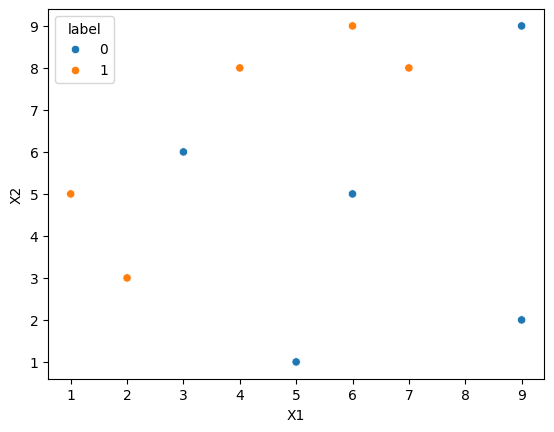

In [222]:
import seaborn as sns
sns.scatterplot(x=df['X1'], y=df['X2'], hue=df['label'])

In [225]:
df['weights'] = 1/df.shape[0]

In [226]:
df

,X1,X2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [227]:
from sklearn.tree import DecisionTreeClassifier

In [228]:
dt1 = DecisionTreeClassifier(max_depth=1)

In [229]:
X = df.iloc[:, 0:2].values
y = df.iloc[:, 2].values

In [230]:
dt1.fit(X, y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]'),
 Text(0.625, 0.5, '  False')]

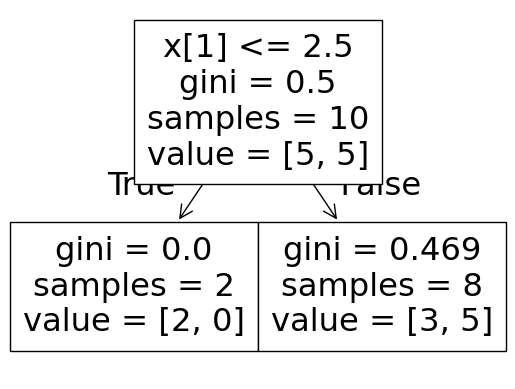

In [232]:
from sklearn.tree import plot_tree
plot_tree(dt1)

<Axes: >

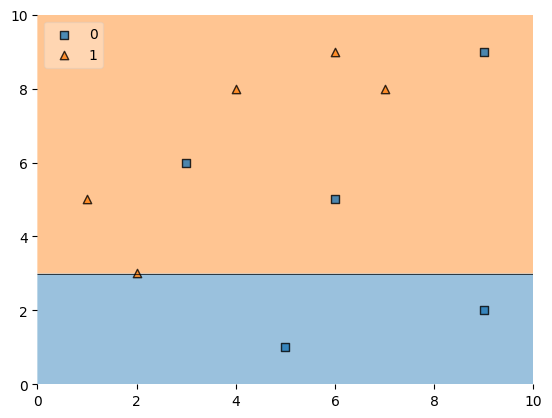

In [233]:
plot_decision_regions(X, y, clf=dt1, legend=2)

In [234]:
df['y_pred'] = dt1.predict(X)

In [169]:
df

,X1,X2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,1
3,4,8,1,0.1,1
4,5,1,0,0.1,0
5,6,9,1,0.1,1
6,6,5,0,0.1,1
7,7,8,1,0.1,1
8,9,9,0,0.1,1
9,9,2,0,0.1,0


In [235]:
def calculate_model_weight(error) :
    return 0.5 * np.log((1-error)/(error))

In [236]:
alpha1 = calculate_model_weight(0.3)
alpha1

np.float64(0.42364893019360184)

In [237]:
def update_row_weights(row, alpha=0.423) :
    if row['label'] == row['y_pred'] :
        return row['weights'] * np.exp(-alpha)
    
    else :
        return row['weights'] * np.exp(alpha)

In [238]:
df['updated_weights'] = df.apply(update_row_weights, axis=1)

In [239]:
df

,X1,X2,label,weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,1,0.152653
3,4,8,1,0.1,1,0.065508
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,1,0.065508
6,6,5,0,0.1,1,0.152653
7,7,8,1,0.1,1,0.065508
8,9,9,0,0.1,1,0.152653
9,9,2,0,0.1,0,0.065508


In [240]:
df['updated_weights'].sum()

np.float64(0.9165153319682015)

In [241]:
df['normalized weights'] = df['updated_weights']/df['updated_weights'].sum()

In [242]:
df

,X1,X2,label,weights,y_pred,updated_weights,normalized weights
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,1,0.152653,0.166559
3,4,8,1,0.1,1,0.065508,0.071475
4,5,1,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,1,0.065508,0.071475
6,6,5,0,0.1,1,0.152653,0.166559
7,7,8,1,0.1,1,0.065508,0.071475
8,9,9,0,0.1,1,0.152653,0.166559
9,9,2,0,0.1,0,0.065508,0.071475


In [243]:
df['normalized weights'].sum()

np.float64(1.0)

In [244]:
df['cumsum_upper'] = np.cumsum(df['normalized weights'])

In [245]:
df['cumsum_lower'] = df['cumsum_upper'] - df['normalized weights']

In [246]:
df[['X1', 'X2', 'label', 'weights', 'y_pred', 'updated_weights', 'cumsum_lower', 'cumsum_upper']]

,X1,X2,label,weights,y_pred,updated_weights,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.065508,0.000000,0.071475
1,2,3,1,0.1,1,0.065508,0.071475,0.142950
2,3,6,0,0.1,1,0.152653,0.142950,0.309508
3,4,8,1,0.1,1,0.065508,0.309508,0.380983
4,5,1,0,0.1,0,0.065508,0.380983,0.452458
5,6,9,1,0.1,1,0.065508,0.452458,0.523933
6,6,5,0,0.1,1,0.152653,0.523933,0.690492
7,7,8,1,0.1,1,0.065508,0.690492,0.761967
8,9,9,0,0.1,1,0.152653,0.761967,0.928525
9,9,2,0,0.1,0,0.065508,0.928525,1.000000


In [248]:
def create_new_dataset(df):
    indices = []

    for i in range(df.shape[0]) :
        a = np.random.random()
        for index, row in df.iterrows() :
            if row['cumsum_upper'] > a and a > row['cumsum_lower'] :
                indices.append(index)
    
    return indices

In [249]:
index_values = create_new_dataset(df)

In [250]:
index_values

[9, 4, 6, 1, 9, 2, 8, 3, 1, 3]

In [253]:
second_df = df.iloc[index_values, [0, 1, 2, 3]]
second_df

,X1,X2,label,weights
9,9,2,0,0.1
4,5,1,0,0.1
6,6,5,0,0.1
1,2,3,1,0.1
9,9,2,0,0.1
2,3,6,0,0.1
8,9,9,0,0.1
3,4,8,1,0.1
1,2,3,1,0.1
3,4,8,1,0.1


In [254]:
dt2 = DecisionTreeClassifier(max_depth=1)

In [255]:
X = second_df.iloc[:, 0:2].values
y = second_df.iloc[:, 2].values

In [256]:
dt2.fit(X, y)

DecisionTreeClassifier(max_depth=1)

<Axes: >

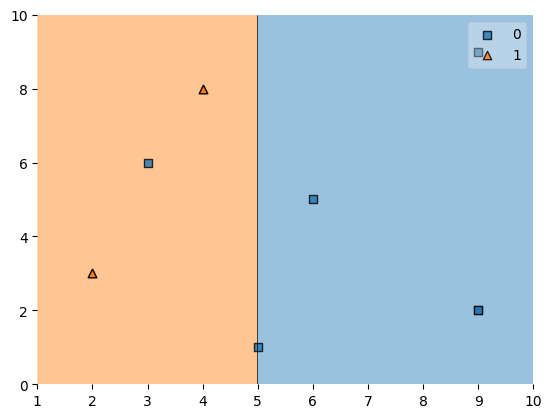

In [257]:
plot_decision_regions(X, y, clf=dt2)

In [258]:
second_df['y_pred'] = dt2.predict(X)

In [259]:
second_df

,X1,X2,label,weights,y_pred
9,9,2,0,0.1,0
4,5,1,0,0.1,0
6,6,5,0,0.1,0
1,2,3,1,0.1,1
9,9,2,0,0.1,0
2,3,6,0,0.1,1
8,9,9,0,0.1,0
3,4,8,1,0.1,1
1,2,3,1,0.1,1
3,4,8,1,0.1,1


In [260]:
alpha2 = calculate_model_weight(0.1)

In [261]:
alpha2

np.float64(1.0986122886681098)

In [262]:
def update_row_weights(row, alpha=1.098) :
    if row['label'] == row['y_pred'] :
        return row['weights'] * np.exp(-alpha)
    
    else :
        return row['weights'] * np.exp(alpha)

In [263]:
second_df['updated_weights'] = second_df.apply(update_row_weights, axis=1)

In [264]:
second_df

,X1,X2,label,weights,y_pred,updated_weights
9,9,2,0,0.1,0,0.033354
4,5,1,0,0.1,0,0.033354
6,6,5,0,0.1,0,0.033354
1,2,3,1,0.1,1,0.033354
9,9,2,0,0.1,0,0.033354
2,3,6,0,0.1,1,0.299816
8,9,9,0,0.1,0,0.033354
3,4,8,1,0.1,1,0.033354
1,2,3,1,0.1,1,0.033354
3,4,8,1,0.1,1,0.033354


In [265]:
second_df['normalized_weights'] = second_df['updated_weights']/second_df['updated_weights'].sum()

In [266]:
second_df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights
9,9,2,0,0.1,0,0.033354,0.055590
4,5,1,0,0.1,0,0.033354,0.055590
6,6,5,0,0.1,0,0.033354,0.055590
1,2,3,1,0.1,1,0.033354,0.055590
9,9,2,0,0.1,0,0.033354,0.055590
2,3,6,0,0.1,1,0.299816,0.499694
8,9,9,0,0.1,0,0.033354,0.055590
3,4,8,1,0.1,1,0.033354,0.055590
1,2,3,1,0.1,1,0.033354,0.055590
3,4,8,1,0.1,1,0.033354,0.055590


In [267]:
second_df['cumsum_upper'] = np.cumsum(second_df['normalized_weights'])

In [268]:
second_df['cumsum_lower'] = second_df['cumsum_upper'] - second_df['normalized_weights']

In [269]:
second_df[['X1', 'X2', 'label', 'weights', 'y_pred', 'updated_weights', 'cumsum_lower', 'cumsum_upper']]

,X1,X2,label,weights,y_pred,updated_weights,cumsum_lower,cumsum_upper
9,9,2,0,0.1,0,0.033354,0.000000,0.055590
4,5,1,0,0.1,0,0.033354,0.055590,0.111179
6,6,5,0,0.1,0,0.033354,0.111179,0.166769
1,2,3,1,0.1,1,0.033354,0.166769,0.222358
9,9,2,0,0.1,0,0.033354,0.222358,0.277948
2,3,6,0,0.1,1,0.299816,0.277948,0.777642
8,9,9,0,0.1,0,0.033354,0.777642,0.833231
3,4,8,1,0.1,1,0.033354,0.833231,0.888821
1,2,3,1,0.1,1,0.033354,0.888821,0.944410
3,4,8,1,0.1,1,0.033354,0.944410,1.000000


In [270]:
index_values = create_new_dataset(second_df)

In [271]:
third_df = second_df.iloc[index_values,[0,1,2,3]]

In [272]:
third_df

,X1,X2,label,weights
6,6,5,0,0.1
6,6,5,0,0.1
4,5,1,0,0.1
6,6,5,0,0.1
6,6,5,0,0.1
6,6,5,0,0.1
6,6,5,0,0.1
6,6,5,0,0.1
6,6,5,0,0.1
1,2,3,1,0.1


In [273]:
dt3 = DecisionTreeClassifier(max_depth=1)

X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

dt3.fit(X,y)

DecisionTreeClassifier(max_depth=1)

<Axes: >

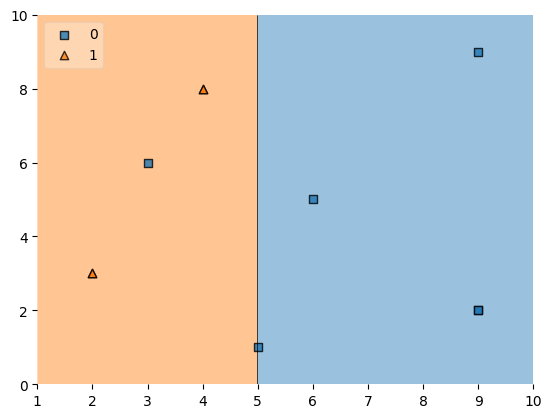

In [274]:
plot_decision_regions(X, y, clf=dt3, legend=2)

In [275]:
third_df['y_pred'] = dt3.predict(X)

In [276]:
third_df

,X1,X2,label,weights,y_pred
6,6,5,0,0.1,0
6,6,5,0,0.1,0
4,5,1,0,0.1,0
6,6,5,0,0.1,1
6,6,5,0,0.1,0
6,6,5,0,0.1,1
6,6,5,0,0.1,0
6,6,5,0,0.1,1
6,6,5,0,0.1,1
1,2,3,1,0.1,1


In [277]:
alpha3 = calculate_model_weight(0.7)
alpha3

np.float64(-0.4236489301936017)

In [278]:
print(alpha1,alpha2,alpha3)

0.42364893019360184 1.0986122886681098 -0.4236489301936017


In [280]:
query = np.array([1,5]).reshape(1,2)
dt1.predict(query)

array([1])

In [281]:
dt2.predict(query)

array([1])

In [282]:
dt3.predict(query)

array([1])

In [283]:
alpha1*1 + alpha2*(1) + alpha3*(1)

np.float64(1.09861228866811)

In [284]:
np.sign(1.09)

np.float64(1.0)